In [1]:
#!/usr/bin/env python3

import sys
from time import time


def is_neg(var):
    return var[0] == '-'


def neg(var):
    if is_neg(var):
        return var[1:]
    return '-' + var


def add_edge(a, b):
    if not a in adj:
        adj[a] = []
    if not b in adj:
        adj[b] = []
    adj[a].append(b)


def add_edge_inv(a, b):
    if not a in adjInv:
        adjInv[a] = []
    if not b in adjInv:
        adjInv[b] = []
    adjInv[b].append(a)


def dfs1(u):
    if visited[u]:
        return

    visited[u] = True
    for v in adj[u]:
        dfs1(v)

    s.append(u)


def dfs2(u):
    if visitedInv[u]:
        return

    visitedInv[u] = True
    for v in adjInv[u]:
        dfs2(v)

    scc[u] = counter


def dfs3(i):
    if visitedC[i]:
        return

    visitedC[i] = True
    for j in condensed[i]:
        dfs3(j)

    s.append(i)


def solve_2sat(formula):
    global adj
    global adjInv
    global visited
    global visitedInv
    global scc
    global s
    global counter

    adj = {}
    adjInv = {}
    visited = {}
    visitedInv = {}
    scc = {}
    s = []
    counter = 1

    for i in range(len(formula)):
        if len(formula[i]) == 1:
            formula[i] = formula[i] + formula[i]

    for clause in formula:
        visited[clause[0]] = False
        visited[clause[1]] = False
        visitedInv[clause[0]] = False
        visitedInv[clause[1]] = False

        if '-' not in clause[0] and '-' not in clause[1]:
            visited['-' + clause[0]] = False
            visited['-' + clause[1]] = False
            visitedInv['-' + clause[0]] = False
            visitedInv['-' + clause[1]] = False

            add_edge('-' + clause[0], clause[1])
            add_edge_inv('-' + clause[0], clause[1])
            add_edge('-' + clause[1], clause[0])
            add_edge_inv('-' + clause[1], clause[0])
        elif '-' not in clause[0]:
            visited['-' + clause[0]] = False
            visited[clause[1][1:]] = False
            visitedInv['-' + clause[0]] = False
            visitedInv[clause[1][1:]] = False

            add_edge('-' + clause[0], clause[1])
            add_edge_inv('-' + clause[0], clause[1])
            add_edge(clause[1][1:], clause[0])
            add_edge_inv(clause[1][1:], clause[0])
        elif '-' not in clause[1]:
            visited[clause[0][1:]] = False
            visited['-' + clause[1]] = False
            visitedInv[clause[0][1:]] = False
            visitedInv['-' + clause[1]] = False

            add_edge(clause[0][1:], clause[1])
            add_edge_inv(clause[0][1:], clause[1])
            add_edge('-' + clause[1], clause[0])
            add_edge_inv('-' + clause[1], clause[0])
        else:
            visited[clause[0][1:]] = False
            visited[clause[1][1:]] = False
            visitedInv[clause[0][1:]] = False
            visitedInv[clause[1][1:]] = False

            add_edge(clause[0][1:], clause[1])
            add_edge_inv(clause[0][1:], clause[1])
            add_edge(clause[1][1:], clause[0])
            add_edge_inv(clause[1][1:], clause[0])

    for var in visited:
        if not visited[var]:
            dfs1(var)

    while not len(s) == 0:
        n = s[-1]
        s = s[:-1]

        if not visitedInv[n]:
            dfs2(n)
            counter += 1

    for var in scc:
        if '-' not in var:
            if scc[var] == scc['-' + var]:
                return None
        else:
            if scc[var] == scc[var[1:]]:
                return None

    global condensed
    condensed = {}
    global visitedC
    visitedC = {}
    for u in adj:
        for v in adj[u]:
            i = scc[u]
            j = scc[v]

            if i not in condensed:
                visitedC[i] = False
                condensed[i] = []
            if j not in condensed:
                visitedC[j] = False
                condensed[j] = []

            if j not in condensed[i]:
                condensed[i].append(j)

    for i in range(1, counter):
        if not visitedC[i]:
            dfs3(i)

    assignment = {}

    for i in s:
        for var in scc:
            if scc[var] == i and var not in assignment:
                assignment[var] = True
                if '-' not in var:
                    assignment['-' + var] = False
                else:
                    assignment[var[1:]] = False

    return assignment


def evaluate(formula, assignment):
    if not assignment:
        return None

    for var in assignment:
        for i in range(len(formula)):
            for j in range(len(formula[i])):
                if formula[i][j] == var:
                    formula[i][j] = "True" if assignment[var] else "False"

    formula_str = " and ".join(
        ["(" + " or ".join(clause) + ")" for clause in formula])
    #print(formula_str)
    return eval(formula_str)


def solve(line):
    formula = [clause.split(",") for clause in line.split(";")]

    start = time()
    solution = solve_2sat(formula)
    time_taken = time() - start
    # if solution:
    #     print("yes")
    #     vs = []
    #     for clause in formula:
    #         for var in clause:
    #             if '-' in var:
    #                 vs.append(var[1:])
    #             else:
    #                 vs.append(var)

    #     vs = list(set(vs))
    #     for i in range(len(vs) - 1):
    #         print(vs[i] + "=" + ("T" if solution[vs[i]] else "F"), end=",")
    #     print(vs[-1] + "=" + ("T" if solution[vs[-1]] else "F"))
    #     # print(formula)
    # else:
    #     print("no")
    return len(formula), time_taken



100%|██████████| 10/10 [00:26<00:00,  2.60s/it][[1.00000000e+00 3.71932983e-05]
 [1.00000000e+05 4.52114105e-01]
 [2.00000000e+05 8.88299942e-01]
 [3.00000000e+05 1.38440299e+00]
 [4.00000000e+05 1.74441099e+00]
 [5.00000000e+05 2.13750482e+00]
 [6.00000000e+05 2.67095685e+00]
 [7.00000000e+05 2.97516489e+00]
 [8.00000000e+05 3.45610785e+00]
 [9.00000000e+05 3.91634297e+00]]



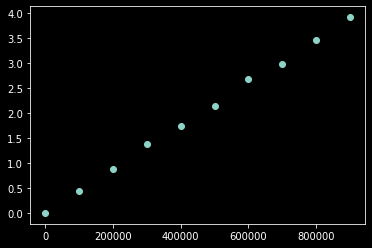

In [2]:
def build_formula(length):
    return "a,b;" * (length - 1) + "a,-d"


def build_formula_list(max_length):
    formula_list = []
    for length in range(0, max_length, max_length // 10):
        formula_list.append(build_formula(length))
    return formula_list


formula_list = build_formula_list(1000000)

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

length_size_array = []

for formula in tqdm(formula_list):
    length_size_array.append(solve(formula))

length_size_array = np.array(length_size_array)
print(length_size_array)

plt.scatter(length_size_array[:, 0], length_size_array[:, 1])
